#  NLP Project : Detecting adversarial attacks

# Results and ROC graphs

In this part of the code, we use our model functions to estimates the accuracy of our model by simply printing the associated ROC graphs.

# Preliminaries 

First we import our packages.

In [7]:
!pip install matplotlib
!pip install numpy
!pip install sklearn
!pip install scipy
!pip install tensorflow
!pip install pandas
!pip install datasets
!pip install evaluate
!pip install scienceplots

#general 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

#for models
import tensorflow as tf
!pip install transformers
import transformers as tr
import datasets as dt
!pip install sentence_transformers
import sklearn.covariance as Covariance
import sklearn.decomposition as Decomposition
from sklearn.metrics import roc_curve
from sentence_transformers import SentenceTransformer
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
from tqdm.auto import tqdm
import evaluate as ev

from model import *


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

We import our dataset, still the one of the authors of the article "Detecting adversarial examples".

In [2]:
imdb_dataset = pd.read_csv("bert-base-uncased-imdb_bae.csv")

# Results with different attacks.

With the 3 following cells, we compare the accuracies obtained with the MLE method and the RDE methods, when they respond to a **BAE** attack.

In [4]:
dict_train_test = make_train_test("imdb", "bert-base-uncased", "bae", number_attack_sample = 1000)
embeddings = get_embeddings("textattack/bert-base-uncased-imdb", dict_train_test)

No sentence-transformers model found with name /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Score avec l'attaque bae de la méthode MLE {'auc': 0.7014734219269103, 'f1': 0.22787028921998245, 'tpr': 0.338}


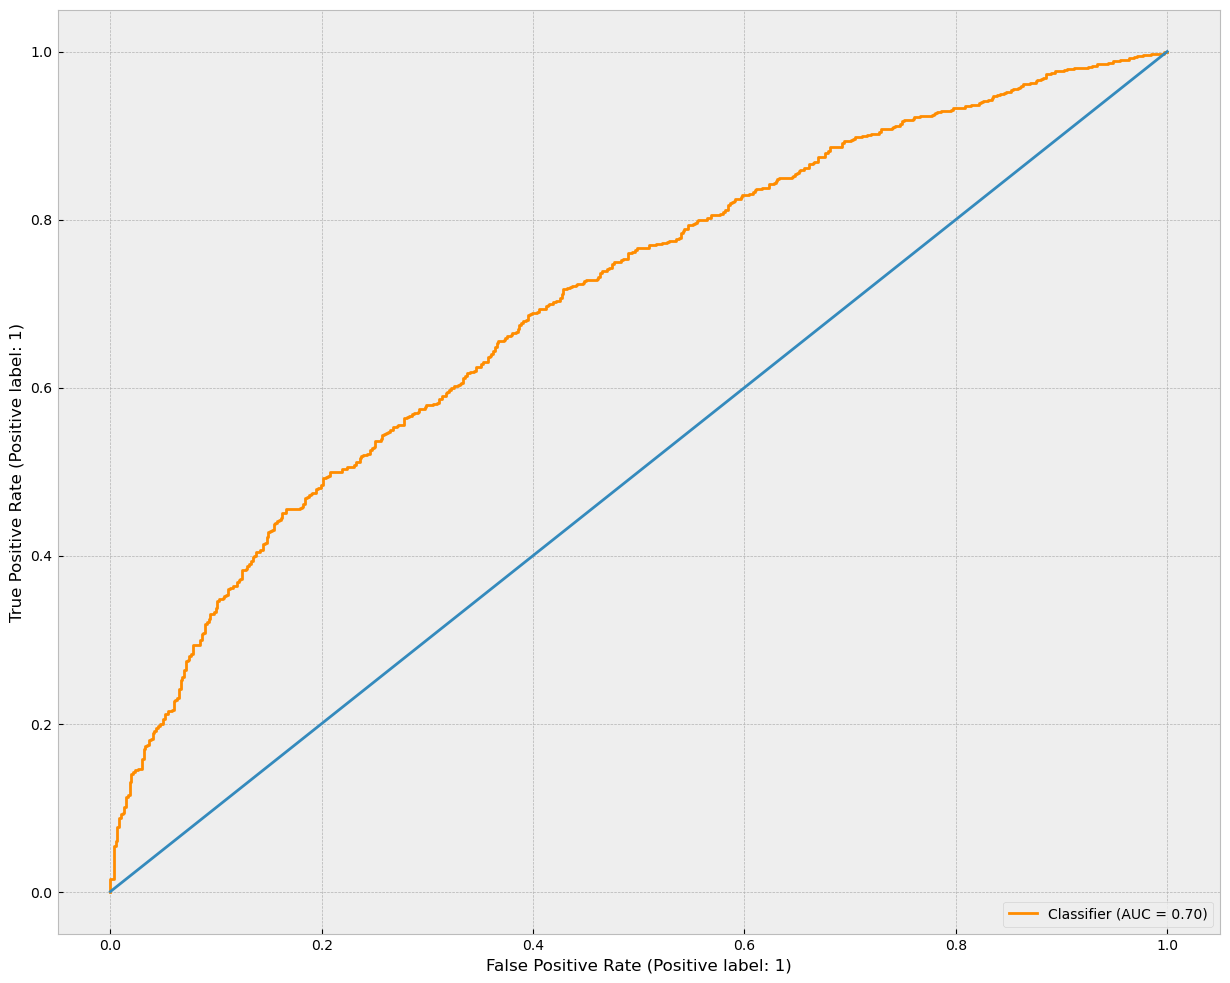

In [26]:
MLEdetector_bae = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "MLE", kernel = "rbf")
MLEresult_bae = MLEdetector_bae(embeddings['test'])

MLEscore_bae = return_metrics(MLEresult_bae, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque bae de la méthode MLE {MLEscore_bae}")

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    MLEresult_bae,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.show()

Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque bae de la méthode RDE {'auc': 0.9013903654485051, 'f1': 0.7686395080707148, 'tpr': 0.807}


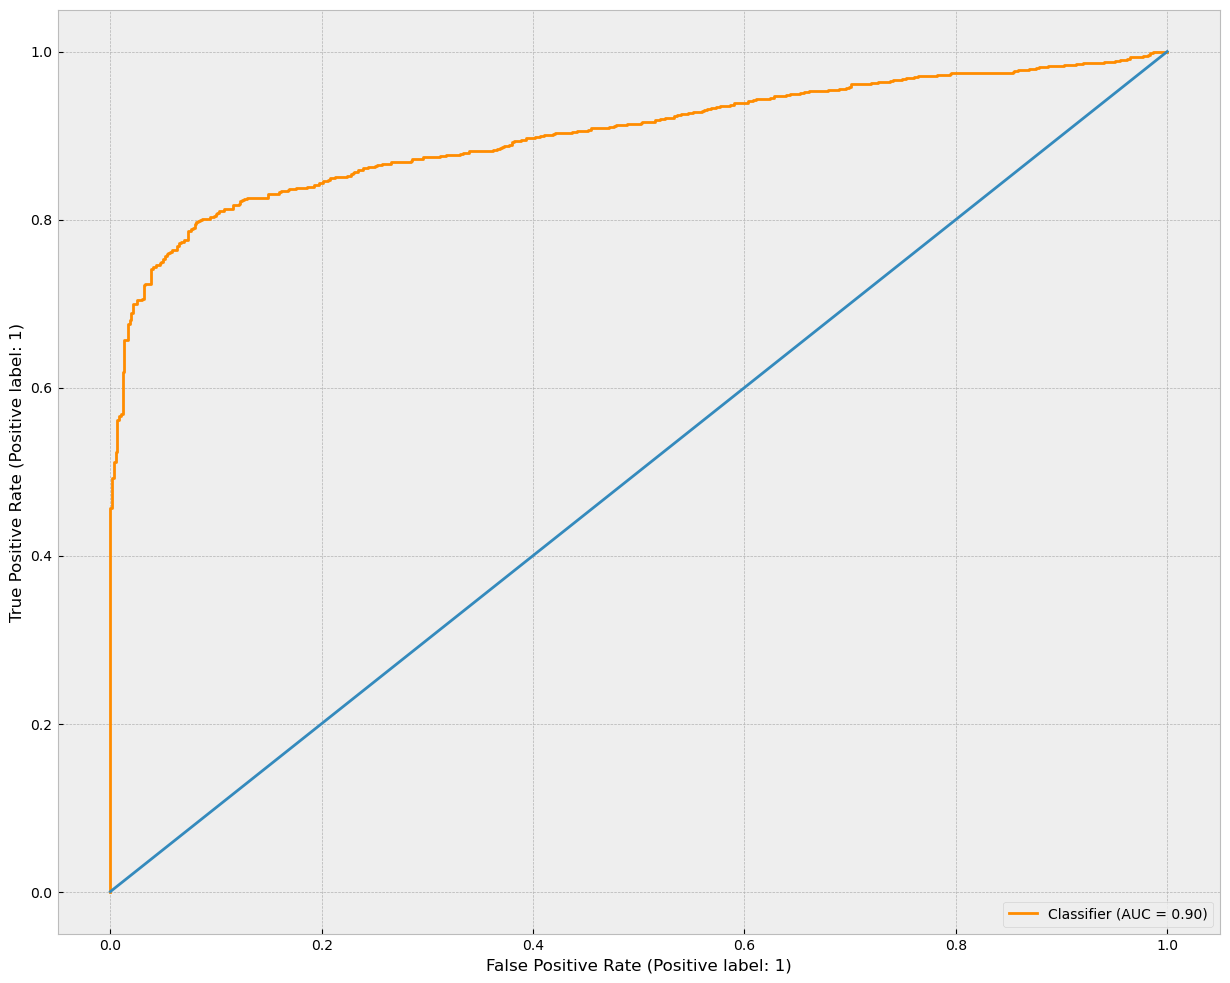

In [27]:
RDEdetector_bae = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "RDE", kernel = "rbf")
RDEresult_bae = RDEdetector_bae(embeddings['test'])

RDEscore_bae = return_metrics(RDEresult_bae, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque bae de la méthode RDE {RDEscore_bae}")

fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    RDEresult_bae,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))

plt.show()
different_attack = ["bae", "pruthi", "pwws", "textfooler", "tf-adj"]

We test these methods with other attacks, and then compare again.

In [30]:
dict_train_test = make_train_test("imdb", "bert-base-uncased", "pruthi", number_attack_sample = 1000)
embeddings = get_embeddings("textattack/bert-base-uncased-imdb", dict_train_test)

No sentence-transformers model found with name /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque pruthi de la méthode MLE {'auc': 0.7140272108843537, 'f1': 0.9315323707498836, 'tpr': 0.326}


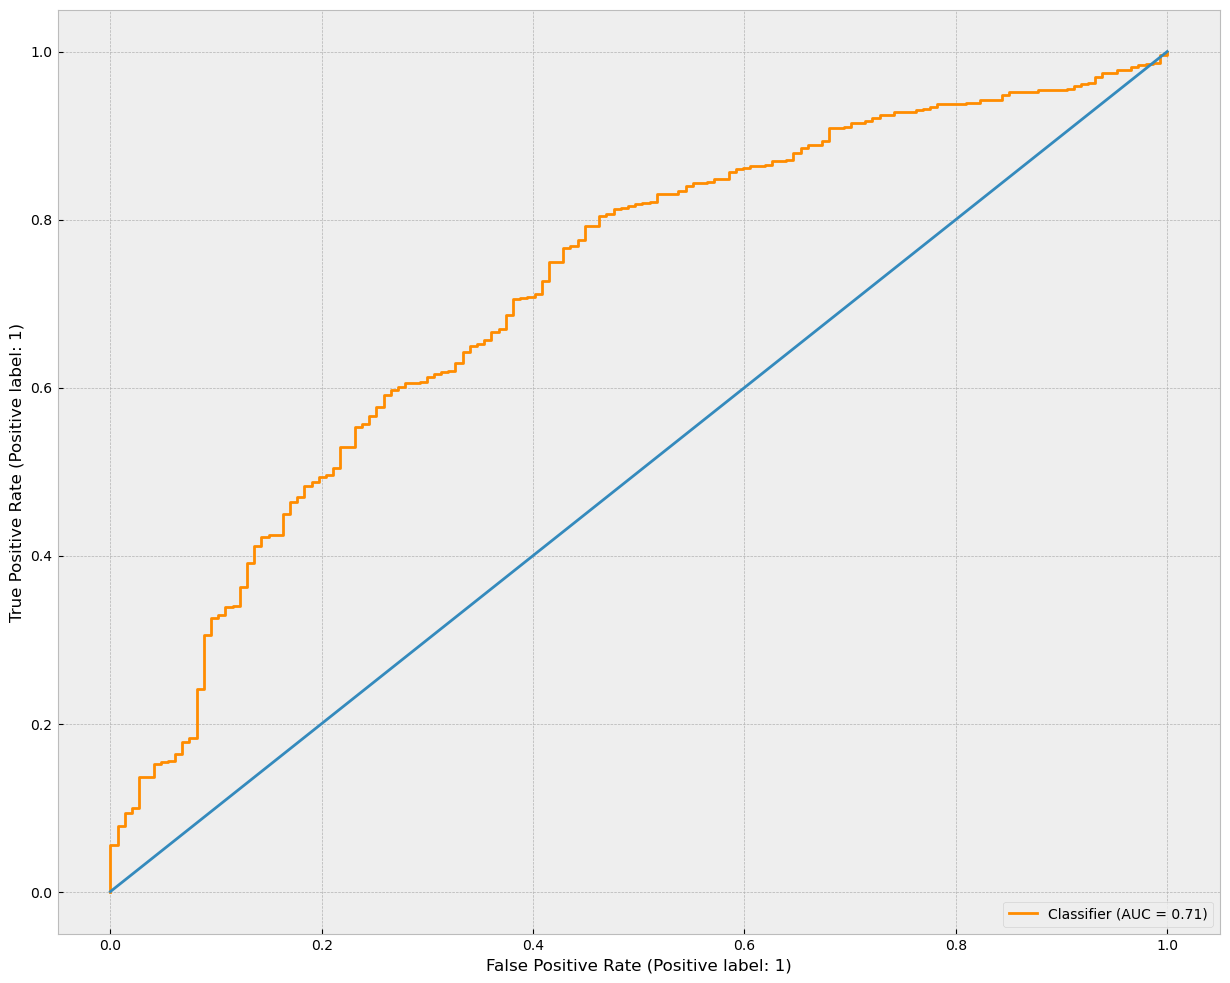

In [31]:
MLEdetector_pruthi = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "MLE", kernel = "rbf")
MLEresult_pruthi = MLEdetector_pruthi(embeddings['test'])

MLEscore_pruthi = return_metrics(MLEresult_pruthi, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque pruthi de la méthode MLE {MLEscore_pruthi}")

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    MLEresult_pruthi,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.show()

Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque pruthi de la méthode RDE {'auc': 0.8947006802721089, 'f1': 0.9315323707498836, 'tpr': 0.793}


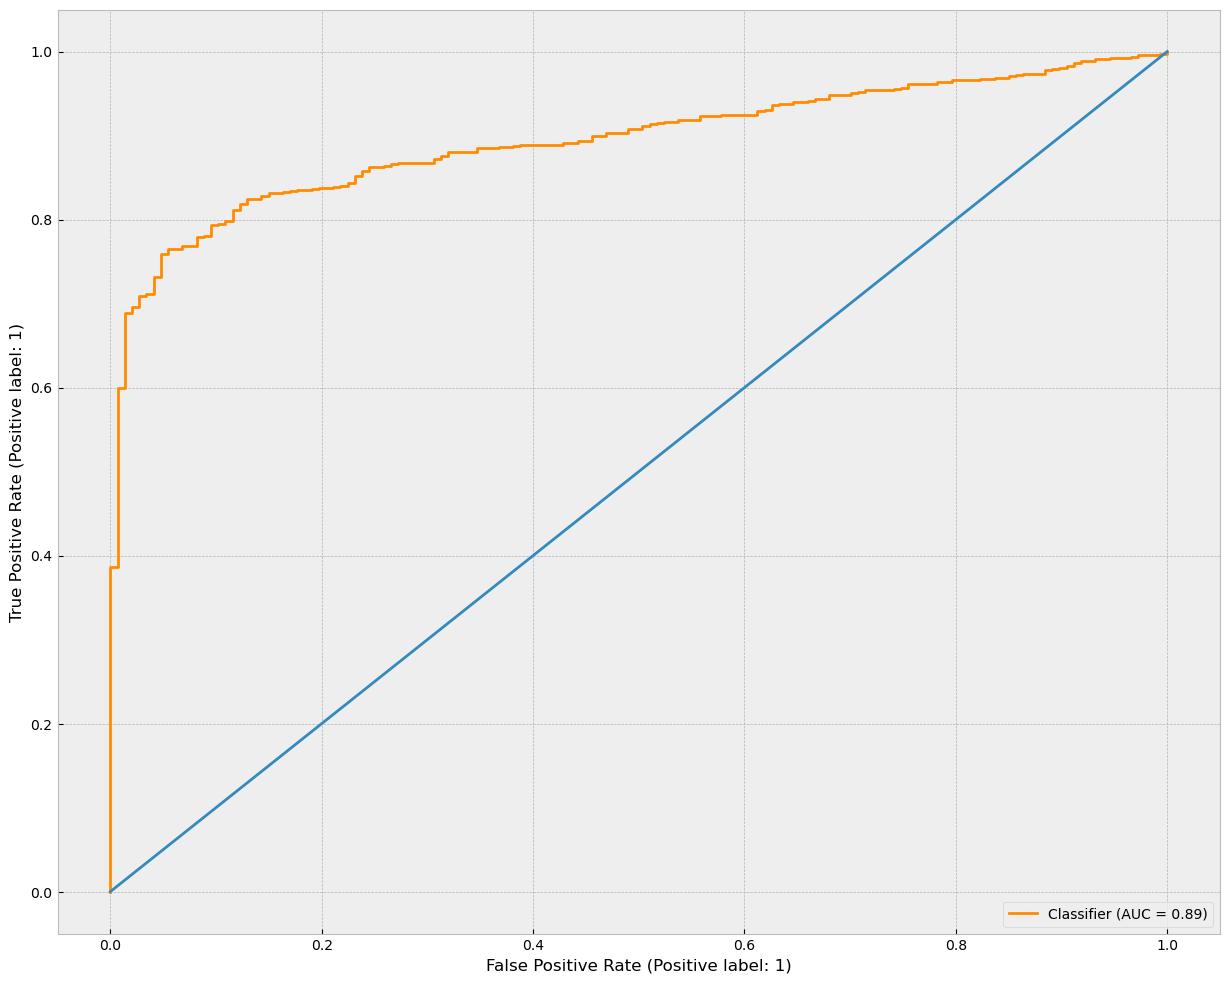

In [32]:
RDEdetector_pruthi = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "RDE", kernel = "rbf")
RDEresult_pruthi = RDEdetector_pruthi(embeddings['test'])

RDEscore_pruthi = return_metrics(RDEresult_pruthi, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque pruthi de la méthode RDE {RDEscore_pruthi}")

fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    RDEresult_pruthi,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))

plt.show()

Now with the **PWWS** attack.

In [34]:
dict_train_test = make_train_test("imdb", "bert-base-uncased", "pwws", number_attack_sample = 1000)
embeddings = get_embeddings("textattack/bert-base-uncased-imdb", dict_train_test)

No sentence-transformers model found with name /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque pwws de la méthode MLE {'auc': 0.6371980306345733, 'f1': 0.20822397200349954, 'tpr': 0.243}


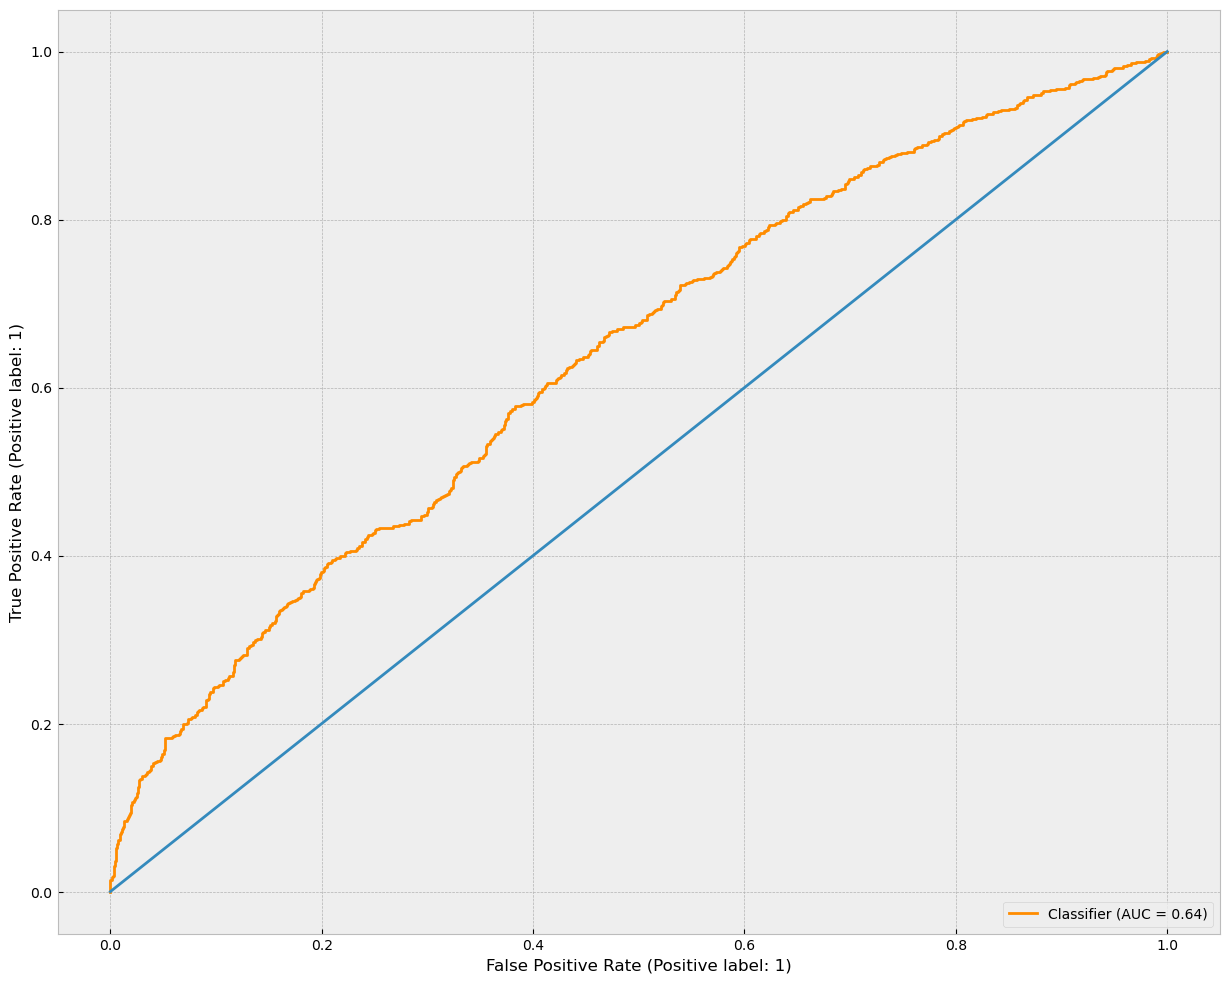

In [37]:
MLEdetector_pwws = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "MLE", kernel = "rbf")
MLEresult_pwws = MLEdetector_pwws(embeddings['test'])

MLEscore_pwws = return_metrics(MLEresult_pwws, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque pwws de la méthode MLE {MLEscore_pwws}")

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    MLEresult_pwws,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.show()

Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque pwws de la méthode RDE {'auc': 0.9103466666666666, 'f1': 0.9302325581395349, 'tpr': 0.816}


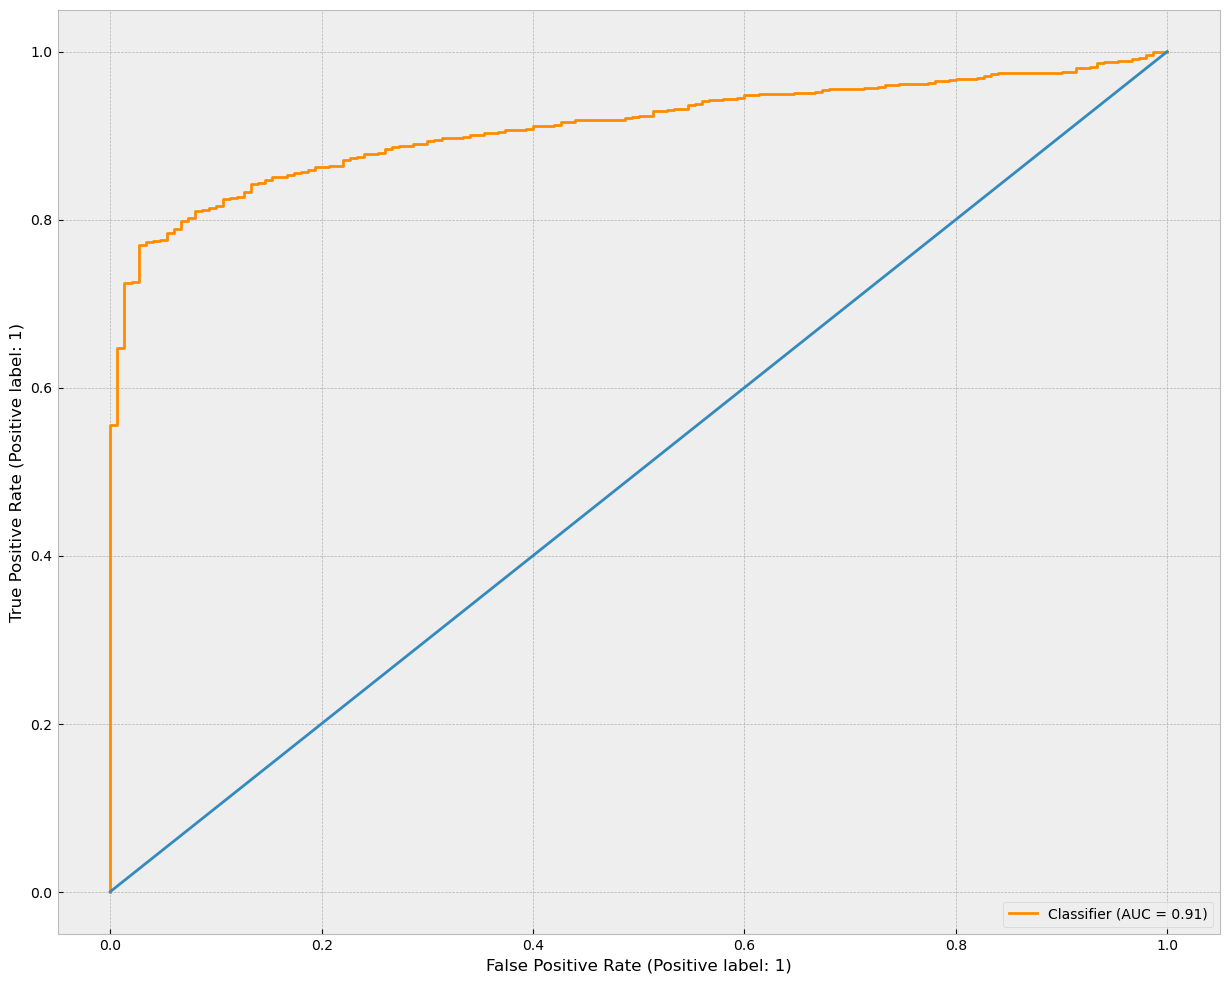

In [55]:
RDEdetector_pwws = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "RDE", kernel = "rbf")
RDEresult_pwws = RDEdetector_pwws(embeddings['test'])

RDEscore_pwws = return_metrics(RDEresult_pwws, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque pwws de la méthode RDE {RDEscore_pwws}")

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    RDEresult_pwws,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.show()

**Textfooler attack**

In [56]:
dict_train_test = make_train_test("imdb", "bert-base-uncased", "textfooler", number_attack_sample = 1000)
embeddings = get_embeddings("textattack/bert-base-uncased-imdb", dict_train_test)

No sentence-transformers model found with name /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque pwws de la méthode MLE {'auc': 0.622988082340195, 'f1': 0.23350253807106602, 'tpr': 0.231}


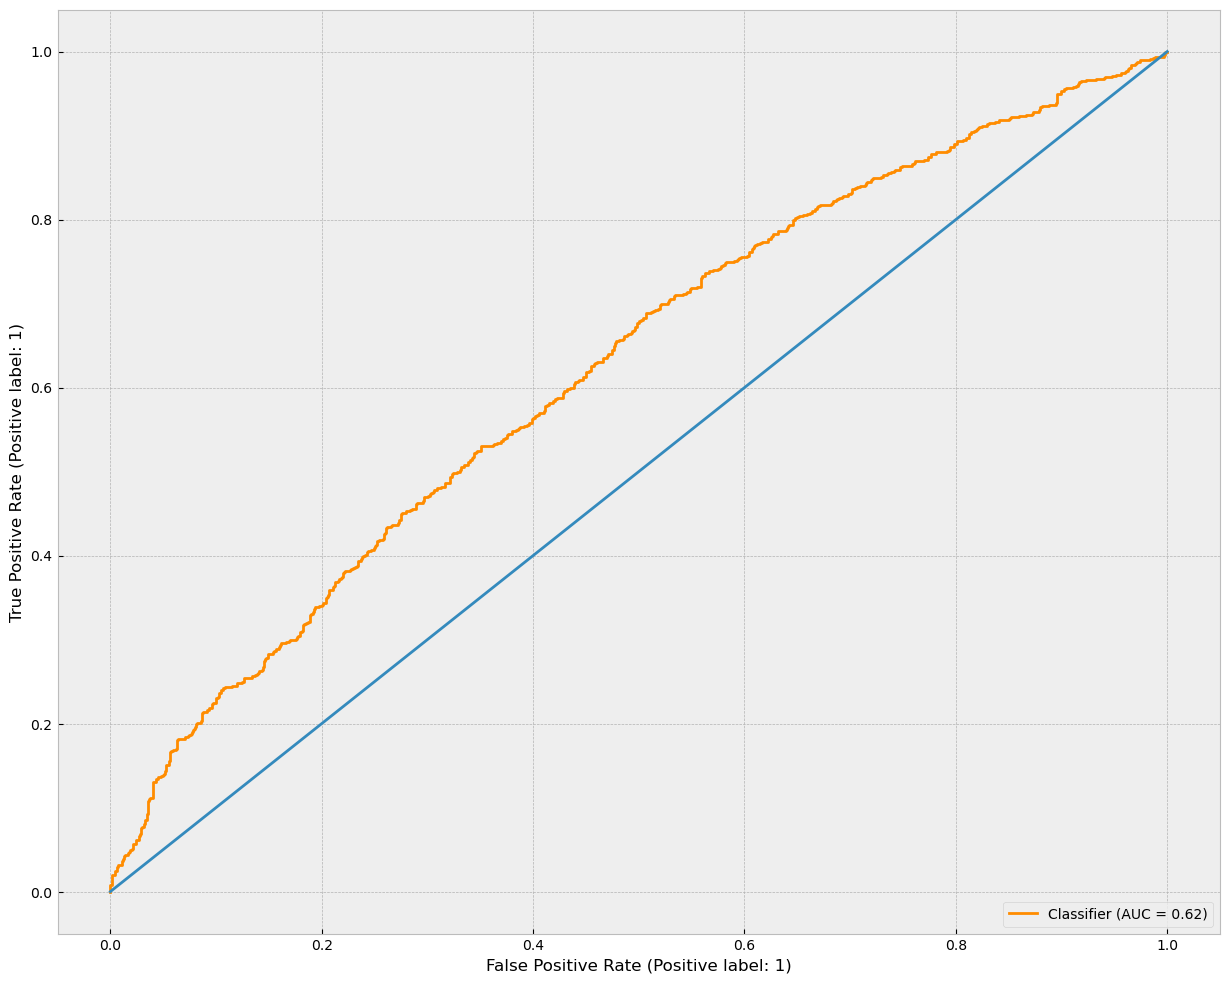

In [57]:
MLEdetector_textfooler = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "MLE", kernel = "rbf")
MLEresult_textfooler = MLEdetector_textfooler(embeddings['test'])

MLEscore_textfooler = return_metrics(MLEresult_textfooler, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque pwws de la méthode MLE {MLEscore_textfooler}")

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    MLEresult_textfooler,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.show()

Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque textfooler de la méthode RDE {'auc': 0.8780184182015168, 'f1': 0.6842285323297982, 'tpr': 0.776}


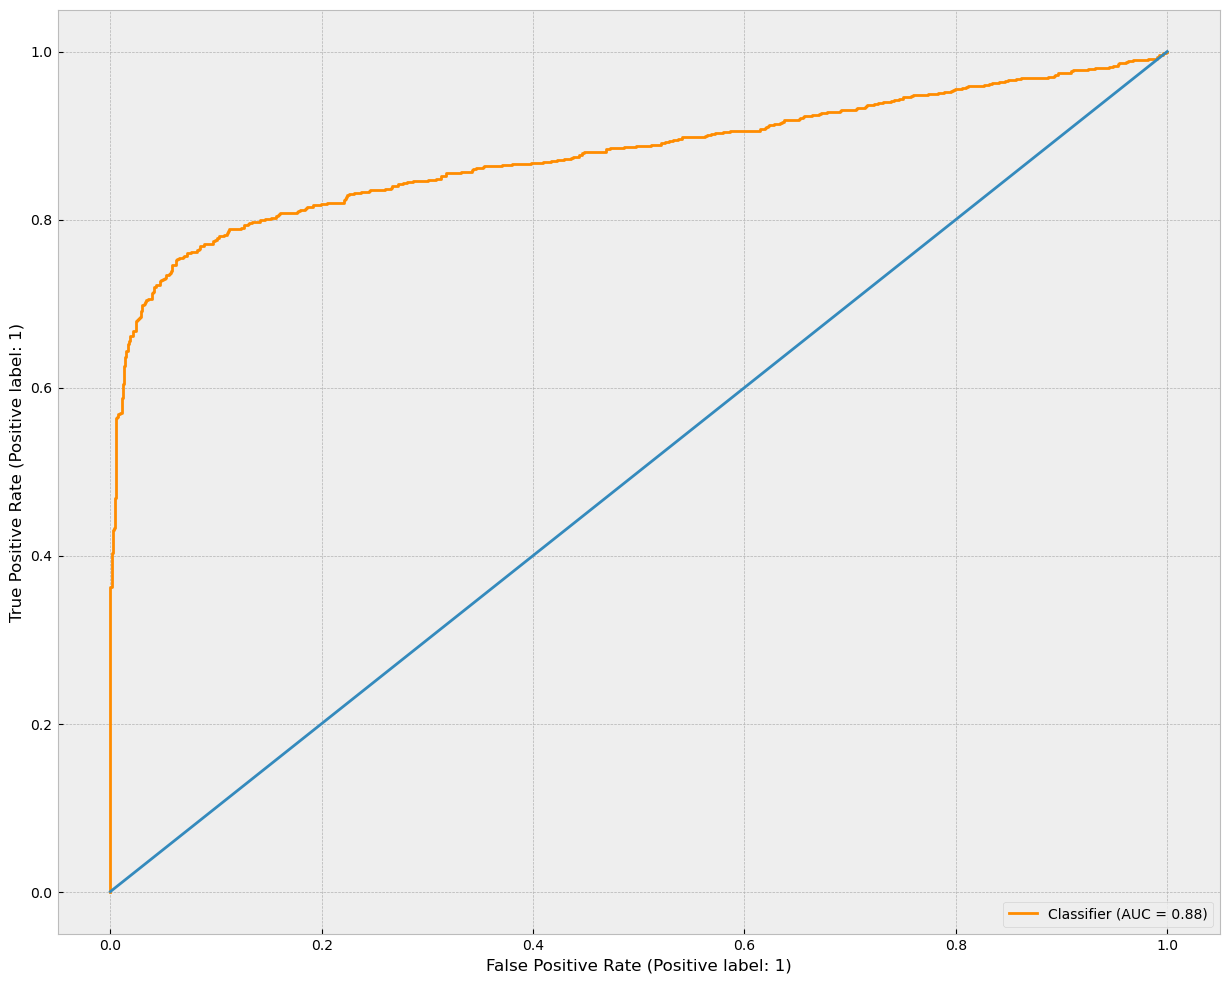

In [58]:
RDEdetector_textfooler = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "RDE", kernel = "rbf")
RDEresult_textfooler = RDEdetector_textfooler(embeddings['test'])

RDEscore_textfooler = return_metrics(RDEresult_textfooler, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque textfooler de la méthode RDE {RDEscore_textfooler}")

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    RDEresult_textfooler,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.show()

**Textfooler-adjusted**

In [59]:
dict_train_test = make_train_test("imdb", "bert-base-uncased", "tf-adj", number_attack_sample = 1000)
embeddings = get_embeddings("textattack/bert-base-uncased-imdb", dict_train_test)

No sentence-transformers model found with name /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/onyxia/.cache/torch/sentence_transformers/textattack_bert-base-uncased-imdb were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque tf-adj de la méthode MLE {'auc': 0.7207177419354838, 'f1': 0.19981998199819984, 'tpr': 0.338}


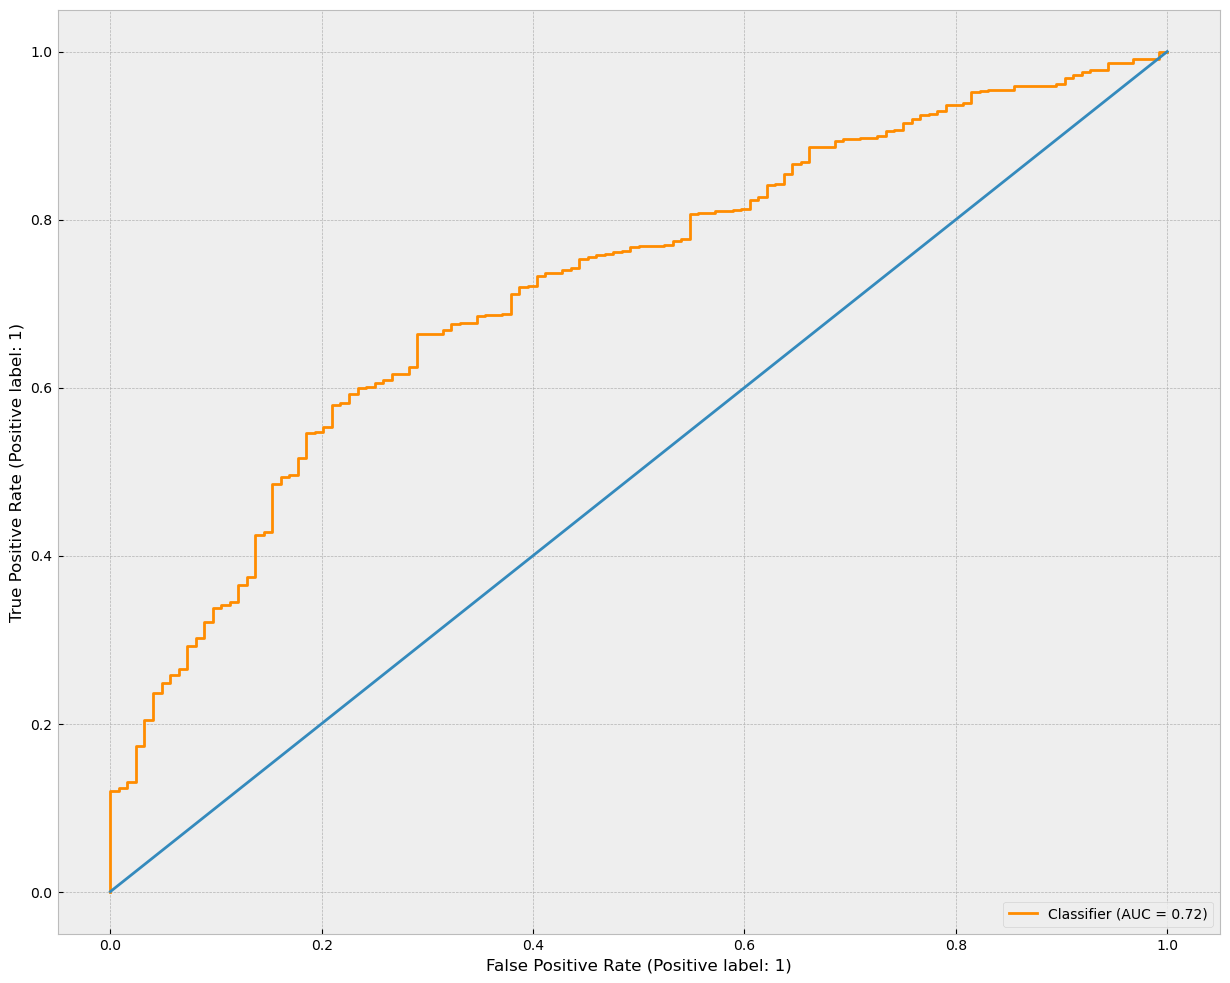

In [60]:
MLEdetector_tf_adj = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "MLE", kernel = "rbf")
MLEresult_tf_adj = MLEdetector_tf_adj(embeddings['test'])

MLEscore_tf_adj = return_metrics(MLEresult_tf_adj, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque tf-adj de la méthode MLE {MLEscore_tf_adj}")

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    MLEresult_tf_adj,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.show()

Progression ::   0%|          | 0/2 [00:00<?, ?it/s]

Score avec l'attaque pwws de la méthode RDE {'auc': 0.902741935483871, 'f1': 0.9416195856873824, 'tpr': 0.799}


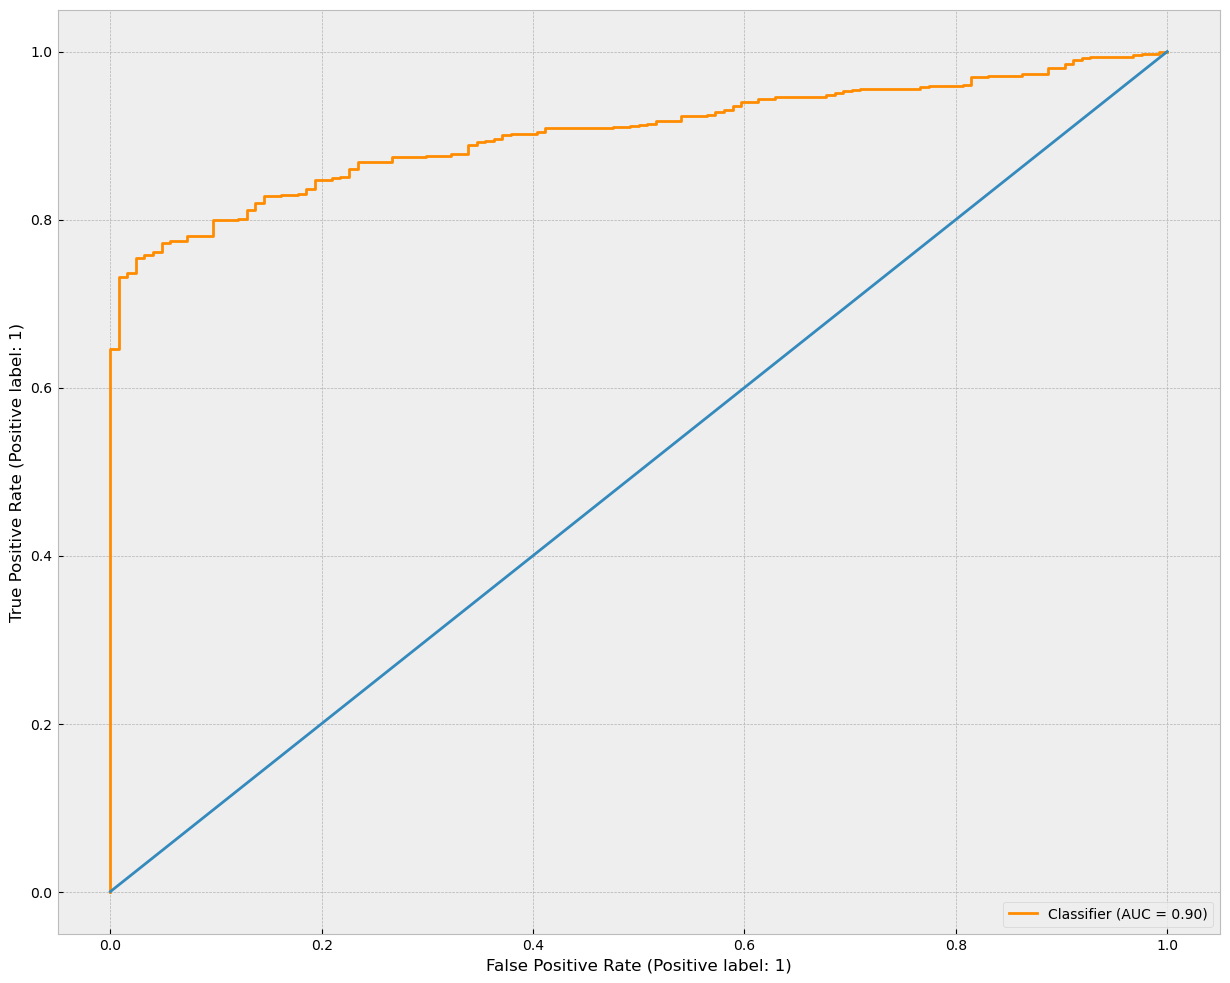

In [61]:
RDEdetector_tf_adj = make_detector(embeddings['train'], dict_train_test["train"]["label"], estimation_type = "RDE", kernel = "rbf")
RDEresult_tf_adj = RDEdetector_tf_adj(embeddings['test'])

RDEscore_tf_adj = return_metrics(RDEresult_tf_adj, 1 - dict_train_test["test"]["label"], 0.1)

print(f"Score avec l'attaque pwws de la méthode RDE {RDEscore_tf_adj}")

plt.style.use('bmh')
fig,ax = plt.subplots(figsize = (15, 12))

RocCurveDisplay.from_predictions(
    1 - dict_train_test["test"]["label"],
    RDEresult_tf_adj,
    color="darkorange",
    ax = ax
)
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10))
plt.show()